In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os
import matplotlib.font_manager
from matplotlib import pyplot as plt
import csv
%matplotlib inline

font = 'Arial'
plt.rcParams['font.family'] = font
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = font
plt.rcParams['mathtext.bf'] = font
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.width'] = 0.5

In [48]:
def metrpo(logdir):
    result = []
    for subdir in os.listdir(logdir):
        d = []
        with open(os.path.join(logdir,subdir, 'progress.csv'), mode='r') as data:
            reader = csv.reader(data, delimiter = ',')
            for row in reader:
                d.append(row)
        d = np.array(d)
        idx = np.where(d[0]=='AverageReturn', True, False)
        result.append(d[1:,idx])
        
    
    result = np.array(result, dtype = float)
    result = result.squeeze(-1)
    n = result.shape[1]
    mean = np.mean(result, axis = 0)
    std = np.std(result, axis = 0)
    return mean, std, n

In [49]:
envs = sorted([
    'Inverted_Pendulum',
    'Inverted_Pendulum_Action_Noise',
    'Inverted_Pendulum_Observation_Noise',
    'Halfcheetah',
    'Halfcheetah_Action_Noise',
    'Halfcheetah_Observation_Noise'
])
env_names = dict()
for env in envs:
    p = [x.capitalize() for x in env.split('_')]
    env_names[env] = ' '.join(p)
    
env_names['Inverted_Pendulum_Action_Noise']=r'Inverted Pendulum $\sigma_a = 0.1$'
env_names['Inverted_Pendulum_Observation_Noise']=r'Inverted Pendulum $\sigma_o = 0.1$'
env_names['Halfcheetah_Action_Noise']=r'Halfcheetah $\sigma_a = 0.1$'
env_names['Halfcheetah_Observation_Noise']=r'Halfcheetah $\sigma_o = 0.1$'

In [50]:
from collections import defaultdict
cutoff = defaultdict(lambda: 500)

ylims = defaultdict(lambda: (-20, 1000))
ylims['Inverted_Pendulum'] = (-240, 25)
ylims['Inverted_Pendulum_Action_Noise'] = (-240, 25)
ylims['Inverted_Pendulum_Observation_Noise'] = (-240, 25)
ylims['Halfcheetah'] = (-500, 4000)
ylims['Halfcheetah_Action_Noise'] = (-500, 4000)
ylims['Halfcheetah_Observation_Noise'] = (-500, 2500)

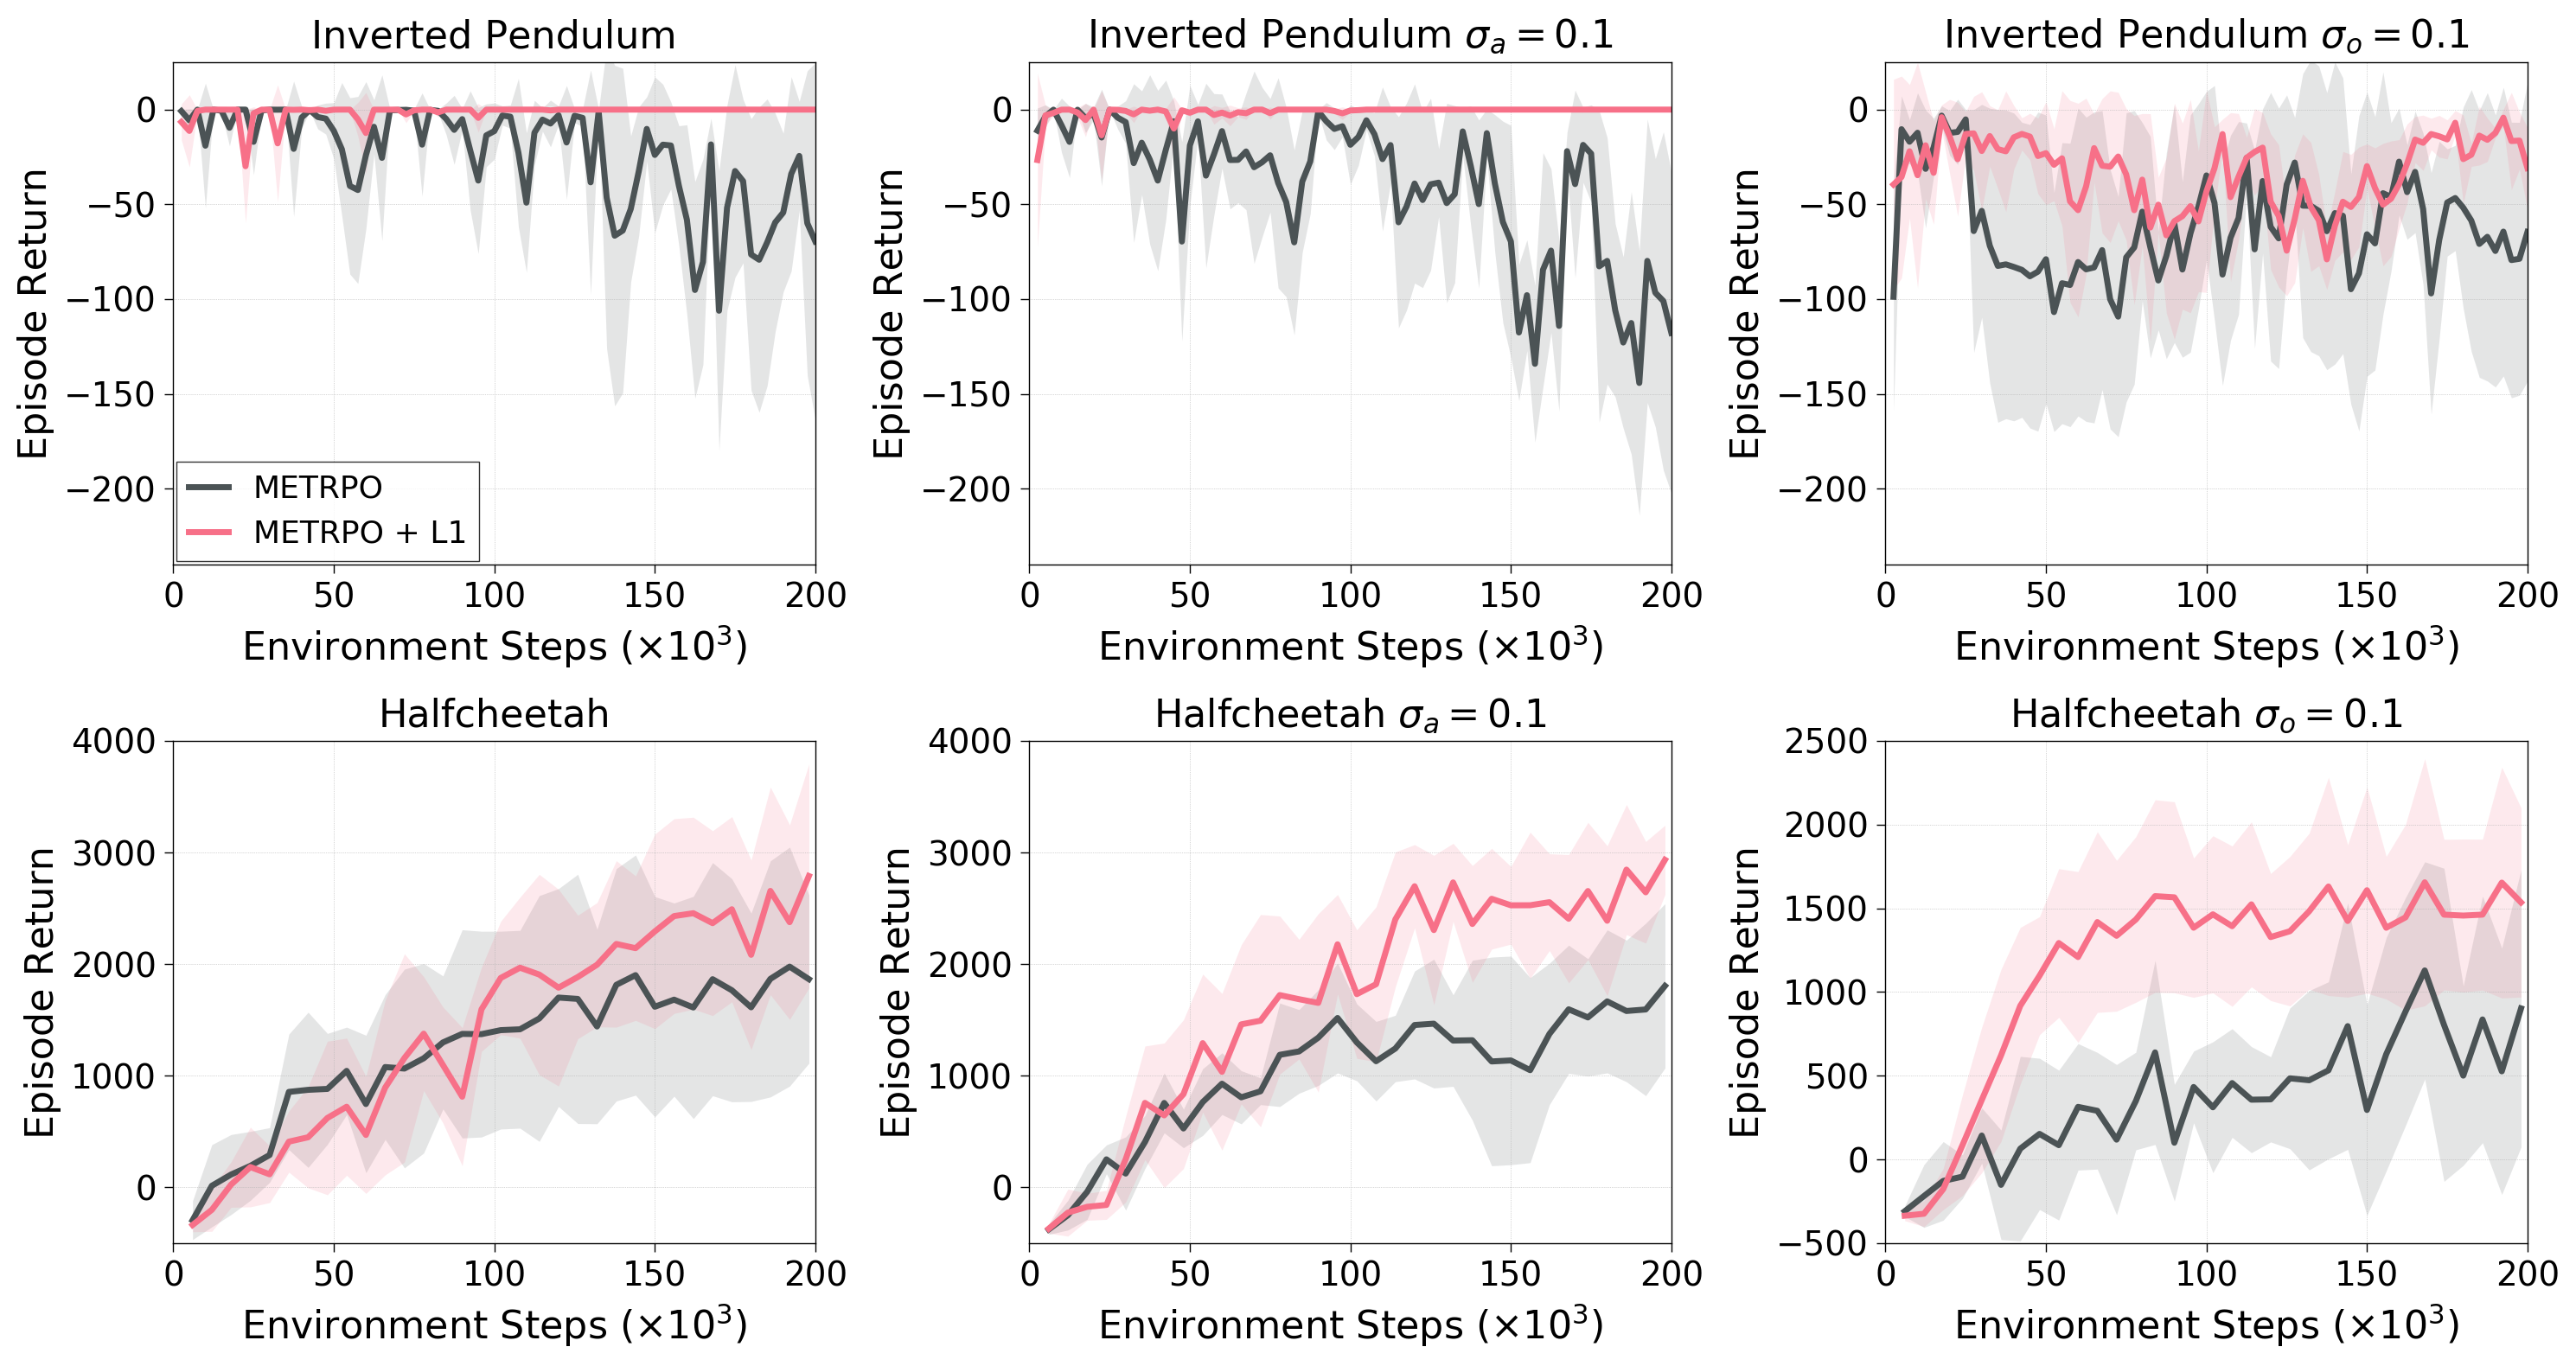

In [51]:
envs = [
    'Inverted_Pendulum',
    'Inverted_Pendulum_Action_Noise',
    'Inverted_Pendulum_Observation_Noise',
    'Halfcheetah',
    'Halfcheetah_Action_Noise',
    'Halfcheetah_Observation_Noise'
]

ncol = 3
nrow = (len(envs) + ncol - 1) // ncol

fig, axs = plt.subplots(nrow, ncol, figsize=(5 * ncol, 4 * nrow), dpi=200)
axs = axs.reshape([nrow, ncol])

for idx, env in enumerate(envs):
    row = idx // ncol
    col = idx % ncol
    ax = axs[row, col]
    
    #############
    # METRPO #
    #############
    mean,std,n= metrpo("./METRPO_RESULTS/L1_OFF/"+ env)
    
    
    if idx<3:
        step = np.arange(1, n + 1)*2.5
    else:
        step = np.arange(1, n + 1)*6
    
    
    
    returns_avg = mean
    returns_std = std
    color=(75/255, 83/255, 85/255)
    linewidth=2.5
    
    ax.plot(
        step,
        returns_avg,
        color=color,
        label='METRPO',
        linewidth=linewidth
    )
    
    ax.fill_between(
        step,
        returns_avg - returns_std,
        returns_avg + returns_std,
        facecolor=(*color, 0.15),
        edgecolor=(0, 0, 0, 0),
    )
    
    #############
    # METRPO + L1 #
    #############
    mean,std,n= metrpo("./METRPO_RESULTS/L1_ON/"+ env)
    
    if idx<3:
        step = np.arange(1, n + 1)*2.5
    else:
        step = np.arange(1, n + 1)*6
    
    returns_avg = mean
    returns_std = std
    
    color=(247/255, 112/255, 136/255)
    linewidth=2.5
    
    ax.plot(
        step,
        returns_avg,
        color=color,
        label='METRPO + L1',
        linewidth=linewidth
    )
    
    ax.fill_between(
        step,
        returns_avg - returns_std,
        returns_avg + returns_std,
        facecolor=(*color, 0.15),
        edgecolor=(0, 0, 0, 0),
    )
    
    ax.set_xlabel('Environment Steps ($\\times 10^3%$)', fontsize=16)
    ax.set_ylabel('Episode Return', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f'{env_names[env]}', fontsize=16)
    ax.grid(alpha=1.0, linestyle=':', linewidth=0.25)
    ax.set_xlim([0, 200])
    if  not idx:
        leg = ax.legend(fancybox=False, fontsize=13, edgecolor='black', borderaxespad=0.1, handlelength=1.25)
    leg.get_frame().set_linewidth(0.5)
    ax.set_ylim(*ylims[env])

plt.tight_layout()
plt.savefig("METRPO_final_results.pdf")